# Analisis de datos sobre la venta de videojuegos

![](https://static1.howtogeekimages.com/wordpress/wp-content/uploads/2024/04/shutterstock_1290635251.jpg?q=49&fit=crop&w=1100&h=618&dpr=2)

Este conjuntos de datos consiste en una rica fuente de información que fornece insights sobre las ventas de videojuegos basado en plataforma y genero para los 100 videogames más populares en todo el mundo.  
Este estudio observa cuales plataformas lideran las ventas globales, cuales generos lideran la preferencia del jugador  y como estes factores cambiaran al largo de los años.   
Analizar estos datos ayudará a entender la evolución de la industria de los juegos, descubrir tendencias que pueden ayudar a los creadores de juegos a lograr el éxito.

|Feature|Descripción |tipo de dato |unidade de medida|clasificación de dato |tratamiento |
|---|--- |---- |--- |--- |--- |
|``Rank``|  Ranking del juego basado en las ventas globales. |int | |indice | |
|``Name``| Nombre del juego. |obj | |cualitativo nominal | |
|``Platform``| Plataforma en la que se lanzó el juego. |obj | | | |
|``Year``| Año de lanzamiento del juego. |int | | |Tratar missings, rellenar los dados faltantes |
|``Genre``| Género del juego. |obj | | | |
|``Publisher``| Editor del juego. |obj | | |Tratar missings, rellenar los dados faltantes |
|``NA_Sales``|Ventas del juego en Norteamérica. |float |millones | | |
|``EU_Sales``|Ventas del juego en Europa.|float |millones | | |
|``JP_Sales``|Ventas del juego en Japón. |float |millones | | |
|``Other_Sales``|Ventas del juego en otras regiones. |float |millones | | |
|``Global_Sales``| Ventas totales del juego en todo el mundo. |float |millones | | |

# Preparación y carga de datos

## Librerias

In [5]:
import os
import sys
sys.path.append(os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024'))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from auto_importer import AutoImporter
from auto_importer import DataFrameDescriber

## Carga de datos

In [10]:
vgsales = pd.read_csv("vgsales.csv", index_col=0)

In [12]:
df = vgsales.copy()

In [13]:
auto_importer = AutoImporter(df)
df_descripcion = DataFrameDescriber(df)

# Primera exploracion

In [14]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [16]:
df.shape

(16598, 10)

In [17]:
auto_importer.inspeccion_inicial()

=== TAMAÑO Y ESTRUCTURA DE LOS DATOS ===
Número total de registros: 16598
Número de columnas: 10
Uso de memoria: 1426.39 KB


=== TIPOS DE DATOS Y NOMBRES DE COLUMNAS ===
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8

In [18]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Limpieza y preprocesado

In [19]:
game_publisher = {
    471: "THQ",
    1305: "EA Sports",
    1664: "Majesco Entertainment",
    2224: "Sony Computer Entertainment",
    3161: "Majesco Entertainment",
    3168: "Majesco Entertainment",
    3768: "Majesco Entertainment",
    4147: "Sega",
    4528: "Majesco Entertainment",
    4637: "Majesco Entertainment",
    5304: "Bandai Namco Games",
    5649: "Majesco Entertainment",
    6274: "Nintendo",
    6439: "Majesco Entertainment",
    6564: "Majesco Entertainment",
    6650: "Majesco Entertainment",
    6851: "Majesco Entertainment",
    7210: "Majesco Entertainment",
    7353: "Atari",
    7472: "Majesco Entertainment",
    7955: "Majesco Entertainment",
    8332: "Majesco Entertainment",
    8343: "Majesco Entertainment",
    8370: "Majesco Entertainment",
    8505: "SouthPeak Games",
    8772: "Majesco Entertainment",
    8850: "Majesco Entertainment",
    8898: "Majesco Entertainment",
    9519: "Astragon",
    9751: "Bandai Namco Games",
    10384: "Majesco Entertainment",
    10496: "Konami",
    11078: "Hasbro Interactive",
    11528: "Majesco Entertainment",
    12489: "Nintendo",
    12519: "Nippon Ichi Software",
    13280: "Capcom",
    13674: "Hudson Soft",
    13964: "Wargaming.net",
    14089: "Nintendo",
    14299: "Hudson Soft",
    14314: "GameMill Entertainment",
    14701: "Excalibur Publishing",
    14945: "Alchemist",
    15059: "Activision",
    15264: "Nintendo",
    15328: "Majesco Entertainment",
    15356: "Astragon",
    15791: "Idea Factory",
    15918: "Aspyr",
    16194: "Gearbox Software",
    16201: "Bandai Namco Games",
    16211: "Majesco Entertainment",
    16370: "Rejet",
    16497: "Majesco Entertainment",
    16546: "Astragon",
    16556: "Focus Home Interactive"
}

In [20]:
game_years = {
                16201: 2011,
                11078: 2000,
                3219: 2008,
                1515: 1980,
                16249: 2008,
                2115: 1977,
                12131: 2006,
                5671: 2004,
                8931: 2004,
                8555: 2001,
                16068: 2003,
                10496: 2007,
                13674: 1998,
                8315: 2010,
                8088: 2010,
                13057: 2011,
                14586: 2012,
                9253: 2010,
                5173: 2010,
                9173: 2010,
                14276: 2012,
                6968: 2010,
                14299: 2007,
                6808: 2010,
                7372: 1983,
                16232: "Canceled",
                12129: 2010,
                15582: 2006,
                713: 2006,
                1128: 2010,
                12827: 2011,
                12628: 2011,
                9669: 2009,
                11325: 2009,
                12489: 2006,
                4234: 1980,
                14058: 2016,
                6649: 2005,
                1587: 1977,
                12533: 2005,
                14476: 2005,
                14879: 2012,
                5197: 2001,
                5510: 1999,
                15881: 2010,
                6928: 2011,
                6921: 2010,
                11575: 2013,
                7650: 2013,
                3717: 2004,
                10999: 2005,
                15879: 2003,
                5872: 2012,
                10364: 2006,
                9312: 2005,
                2021: 1997,
                5304: 2006,
                5659: 1980,
                12017: 2003,
                15918: 2008,
                11923: 2011,
                12931: 2005,
                10831: 2005,
                378: 2003,
                11378: 2011,
                7617: 1997,
                15814: 2010,
                5620: 2002,
                3882: 1980,
                6318: 1978,
                12668: 2010,
                15742: 2006,
                16310: 2003,
                650: 2001,  
                14380: 2010,
                12809: 2008,
                13667: 2008,
                11333: 2010,
                7371: 1992, 
                10274: 2003,
                9822: 2002, 
                6316: 2005, 
                16369: 2010,
                14057: 2011,
                5063: 1980, 
                9983: 2011, 
                11144: 2011,
                10467: 2011,
                10692: 2011,
                4867: 2001, 
                5915: 2011, 
                6127: 2002, 
                1699: 2002, 
                8762: 1978, 
                16194: 2015,
                14089: 2006,
                6285: 1977, 
                16330: 2012,
                8336: 2002, 
                15903: 2007,
                6970: 2001, 
                12250: 2011,
                6498: 2011, 
                8709: 2011, 
                4153: 1982,
                432: 2008,   # LEGO Batman: The Videogame (Wii)
                1500: 2008,  # LEGO Batman: The Videogame (PSP)
                7215: 2011,  # LEGO Harry Potter: Years 5-7 (PC)
                2147: 2011,  # LEGO Harry Potter: Years 5-7 (PS3)
                2088: 2011,  # LEGO Harry Potter: Years 5-7 (X360)
                1435: 2011,  # LEGO Harry Potter: Years 5-7 (Wii)
                4793: 2011,  # LEGO Harry Potter: Years 5-7 (3DS)
                6321: 2011,  # LEGO Harry Potter: Years 5-7 (PSP)
                2840: 2011,  # LEGO Harry Potter: Years 5-7 (DS)
                653: 2008,   # LEGO Indiana Jones: The Original Adventures (Wii)
                1992: 1999,  # Legacy of Kain: Soul Reaver (PS)
                14852: 2009, # Legacy of Ys: Books I & II (DS)
                10760: 2008, # Luminous Arc 2 (JP sales) (DS)
                13677: 2008, # Luxor: Pharaoh's Challenge (Wii)
                2499: 2002,  # MLB SlugFest 20-03 (PS2)
                3423: 2005,  # Madden NFL 06 (X360)
                2486: 2006,  # Madden NFL 07 (PSP)
                2778: 2010,  # Madden NFL 11 (Wii)
                3503: 2001,  # Madden NFL 2002 (XB)
                180: 2003,   # Madden NFL 2004 (PS2)
                14315: 2009, # Majesty 2: The Fantasy Kingdom Sim (X360)
                9870: 2006,  # Major League Baseball 2K6 (PSP)
                14100: 2008, # Major League Baseball 2K8 (PSP)
                15264: 2012, # Mario Tennis (3DS)
                4380: 1980,  # Maze Craze: A Game of Cops 'n Robbers (2600)
                11978: 2004, # McFarlane's Evil Prophecy (PS2)
                11757: 2009, # Mega Man Battle Network: Operation Shooting Star (DS)
                6779: 2006,  # Mega Man X Collection (PS2)
                3240: 2002,  # Metal Gear Solid 2: Substance (XB)
                12711: 2008, # Mobile Ops: The One Year War (X360)
                3196: 2007,  # Monster Hunter 2 (PS2)
                13280: 2013, # Monster Hunter Frontier Online (PS3)
                12917: 2007, # Mountain Bike Adrenaline (PS2)
                7183: 2011,  # Move Fitness (PS3)
                10561: 2009,  # My Healthy Cooking Coach (DS)  
                1651: 2002,
                3470: 2002,
                5903: 2002,
                5164: 2002,
                8206: 2002,
                3755: 2003,
                4799: 2002,
                13735: 2003,
                4538: 2010,
                2288: 2002,
                12214: 2011,
                6044: 2006,
                9524: 2003,
                8169: 2011,
                9083: 2010,
                16060: 2007,
                15868: 2007,
                2588: 2008,
                6213: 2002,
                15001: 2005,
                7910: 2011,
                12240: 2012,
                12030: 2012,
                12519: 2009,
                12186: 2002,
                12881: 2010,
                9744: 2011,
                2297: 2008,
                4474: 2008,
                4936: 2008,
                7384: 2002,
                1135: 2007,
                784: 2007,
                625: 2007,
                1839: 2007,
                6403: 2008, # Rock Revolution PS3
                11545: 2008, # Rock Revolution Wii
                9842: 2008, # Rocksmith PC
                13479: 2009, # RollerCoaster Tycoon PC
                15319: 2009, # Runaway: A Twist of Fate DS
                14162: 2004, # Sabre Wulf GBA
                15200: 2007, # Saint Wii
                10981: 2008, # Samurai Shodown Anthology PSP
                14525: 2007, # Samurai Spirits: Tenkaichi Kenkakuden PS2
                9771: 2002, # Saru! Get You! Million Monkeys PS2
                13872: 2006, # Sega Rally 2006 PS2
                2530: 2008, # Shaun White Snowboarding X360
                15700: 2007, # Shonen Jump's Yu-Gi-Oh! GX Card Almanac DS
                16197: 2008, # Shorts DS
                5840: 2007, # Shrek the Third DS
                4860: 2008, # Silent Hill: Homecoming PS3
                4382: 2008, # Silent Hill: Homecoming X360
                6834: 2010, # Singularity PS3
                5627: 2010, # Singularity X360
                5800: 1978, # Slot Machine 2600
                11800: 2001, # Smashing Drive GC
                4147: 2006, # Sonic the Hedgehog PS3
                608: 1978, # Space Invaders 2600
                8441: 2010, # Splatterhouse PS3
                10047: 2007, # Star Trek: Conquest PS2
                7948: 2006, # Star Trek: Legacy X360
                5771: 2003, # Star Wars Jedi Knight II: Jedi Outcast XB
                15211: 2009, # Steal Princess DS
                9477: 2009, # Street Fighter IV PC
                9817: 2002, # Street Hoops GC
                2116: 2002, # Suikoden III PS2
                4471: 1978, # Super Breakout 2600
                14699: 2001, # Super Duper Sumos GBA
                11110: 2001, # Super Puzzle Fighter II GBA
                9751: 2009,
                8378: 2002,
                14048: 2009,
                4685: 2011,
                8225: 2006,
                3143: 2011,
                7722: 2011,
                2949: 2011,
                6197: 2005,
                3051: 2005,
                4332: 2004,
                9823: 2007,
                10794: 2007,
                5863: 2004,
                5080: 2007,
                3348: 2007,
                11457: 2011,
                13158: 2009,
                14858: 2004,
                6274: 2004,
                2424: 2011,
                2417: 2011,
                16496: 2011,
                4201: 2006,
                12751: 2006,
                14679: 2002,
                5242: 2013,
                6939: 2006,
                11940: 2010,
                12924: 2011,
                9394: 2002,
                8046: 2010,
                7037: 2002,
                1305: 1998,
                5198: 2011,
                14928: 2003,
                8159: 2001,
                14945: 2011,
                6155: 2004,
                7408: 2010,
                8622: 2006,
                15655: 2003,
                16430: 2003,
                9153: 2000,
                7425: 2010,
                9694: 2010,
                16061: 2010,
                2788: 2004,
                3954: 2010,
                2175: 2002,
                15000: 2006,
                15002: 2006,
                15720: 2005,
                13964: 2011,
                15609: 2007,
                2136: 2010,
                12137: 2008,
                7353: 2002,
                15479: 2009,
                11411: 2007,
                8901: 2002,
                471: 2005
                }

In [21]:
for n in df.index:
    if n in game_years.keys():
        df.at[n, 'Year'] = game_years[n]

C:\Users\Felipe\AppData\Local\Temp\ipykernel_2884\1049631621.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Canceled' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[n, 'Year'] = game_years[n]


In [22]:
for n in df.index:
    if n in game_publisher.keys():
        df.at[n, 'Publisher'] = game_publisher[n]

In [23]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       1
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
df = df[df['Year'] != "Canceled"]

In [25]:
abc = df[df['Publisher'].isna()][['Publisher','Name','Platform','Year']]
# abc
pd.DataFrame(abc)

,Publisher,Name,Platform,Year
Rank,,,,


In [26]:
# abc.sort_values(by='Name').iloc[245:272]
# vgsales[vgsales['Year'] == "Canceled"]

In [27]:
abc = df[df['Year'].isna()][['Name','Platform','Year']]
abc

,Name,Platform,Year
Rank,,,


In [28]:
# #FILTER
# vgsales.query('Name.str.startswith("AKB1")')
# vgsales[vgsales.loc[:,'Name'] == "AKB1/48: Idol to Guam de Koishitara..."]

In [29]:
df['Year'] = pd.to_numeric(df['Year'])
df['Year'] = df['Year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16597 non-null  object 
 1   Platform      16597 non-null  object 
 2   Year          16597 non-null  int64  
 3   Genre         16597 non-null  object 
 4   Publisher     16597 non-null  object 
 5   NA_Sales      16597 non-null  float64
 6   EU_Sales      16597 non-null  float64
 7   JP_Sales      16597 non-null  float64
 8   Other_Sales   16597 non-null  float64
 9   Global_Sales  16597 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\Felipe\AppData\Local\Temp\ipykernel_2884\2517050206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'])
C:\Users\Felipe\AppData\Local\Temp\ipykernel_2884\2517050206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


In [30]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
15000,Wii de Asobu: Metroid Prime,Wii,2006,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
15002,Wii de Asobu: Metroid Prime,Wii,2006,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [31]:
df = df.drop_duplicates()

In [32]:
df.shape

(16596, 10)

# Conclusion

Se puede observar que el dataframe está composto de 16596 filas y 10 columnas, la columna rank se convertió en índice, dado que es una columna que no se repite y designa la clasificación de cada juego. Los missings fueron tratados, a través de insvestigación fue posible llenar la base de datos de manera satisfactoria, evitando eliminar datos o insertar datos con valores predichos desde los datos presentes.

# Análisis descriptivo

In [33]:
df_descripcion.describe_numeric()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [34]:
df_descripcion.describe_non_numeric()

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


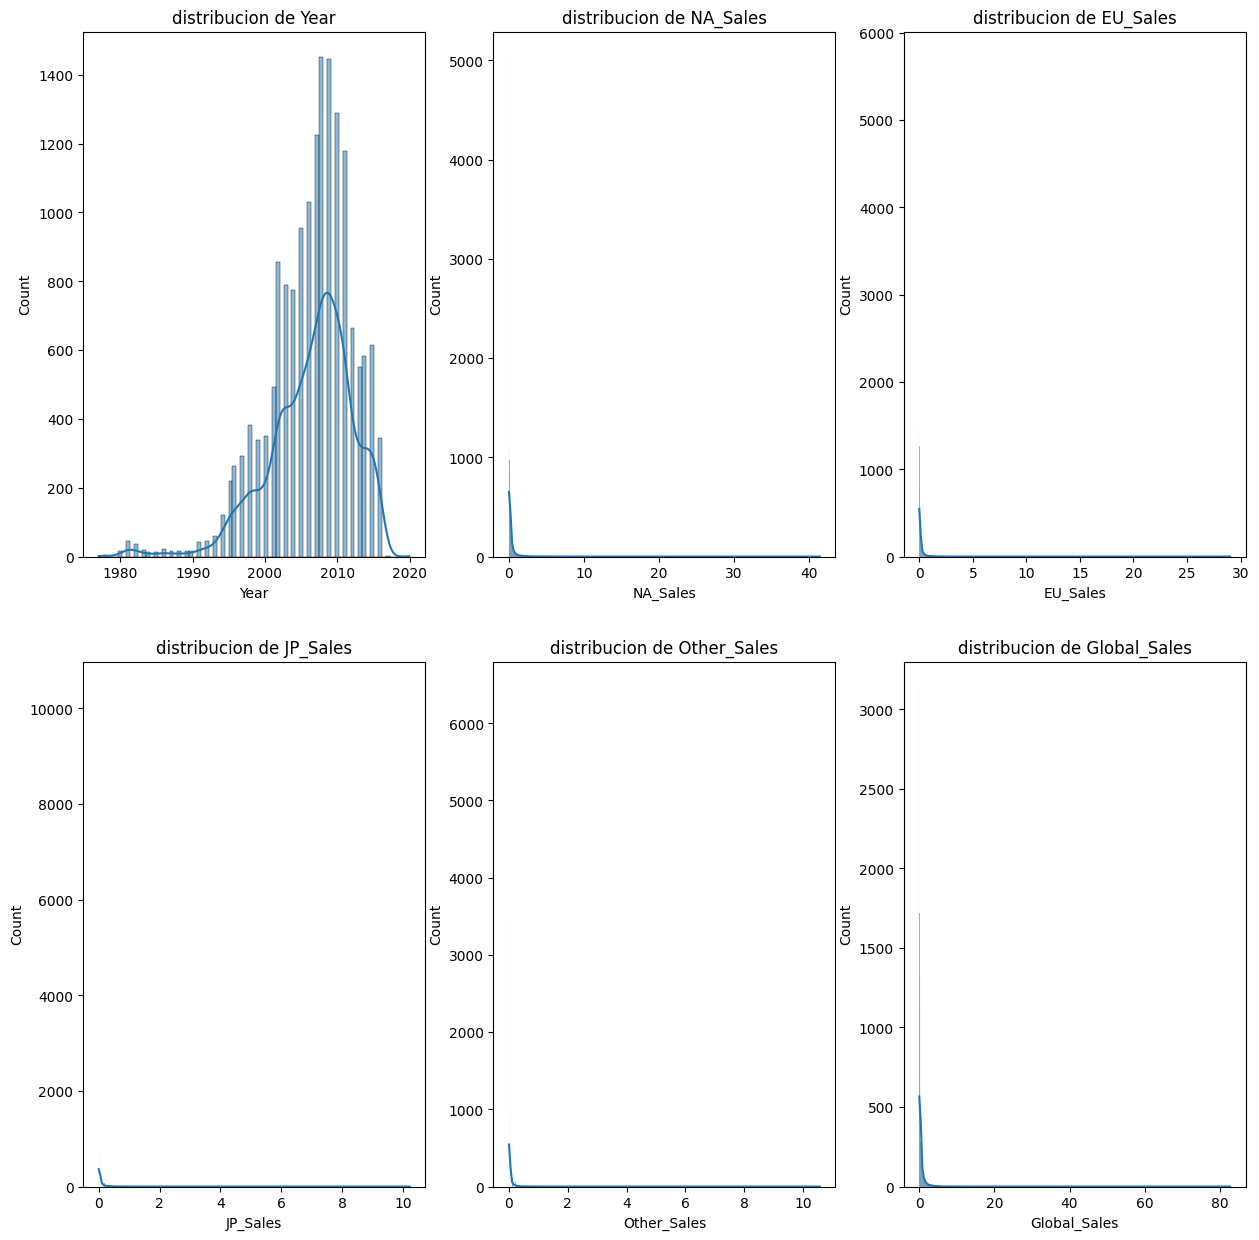

In [35]:
plt.figure(figsize=(15,15))

for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'distribucion de {feature}')